In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("CHURN.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Data Cleaning & Inspection Summary

In [3]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


Every column shows 0 missing values ✅
→ No imputation required.

In [4]:
df.duplicated().sum()

np.int64(0)

OUTPUT 0 DUPLICATES SO NO NEED TO DROP ANYTHING.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


DATATYPES: OBJECTS: COUNTRY AND GENDER AND ALL OTHERS ARE NUMERIC
           SO WE ENCODE OBJECT TYPE VARIABLE BEFORE MODELING.

STATISTICAL SUMMARY...

In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


No missing data, no duplicates, correct datatypes.
Our dataset is ready for EDA — we will now  explore relationships and patterns.

***Step 2 — Exploratory Data Analysis (EDA)***

WE WILL CREATE 5 MEANINGFUL VISUALIZATIONS...
Visuals we’ll make:

Churn distribution (class balance)

Age histogram

Balance vs Churn (boxplot)

Tenure vs Balance (scatter)

Correlation heatmap (numeric relationships)

In [7]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


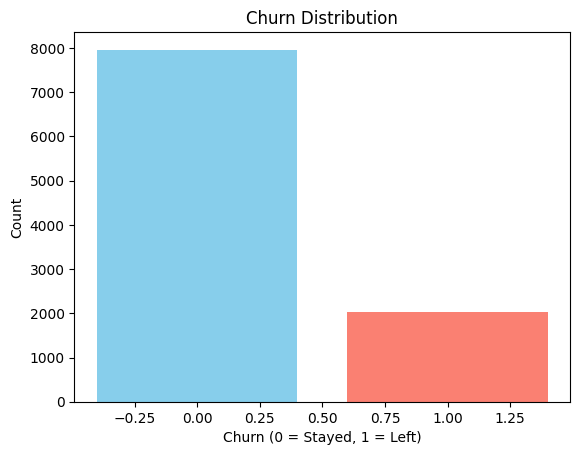

In [11]:
# CHURN DISTRIBUTION
plt.bar(x=df["churn"].value_counts().index,height=df["churn"].value_counts().values,color=["skyblue","salmon"])
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()

Interpretation: Churn Distribution

Total customers: 10,000

Stayed: 7,963 (≈ 79.6%)

Churned: 2,037 (≈ 20.4%)

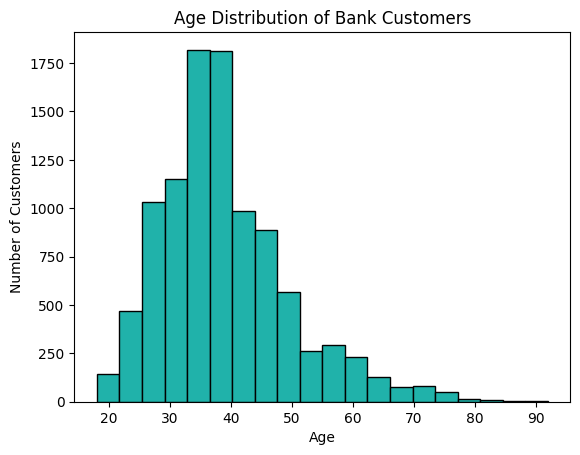

In [12]:
# AGE DISTRIBUTION
plt.hist(df['age'], bins=20, color='lightseagreen', edgecolor='black')
plt.title("Age Distribution of Bank Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

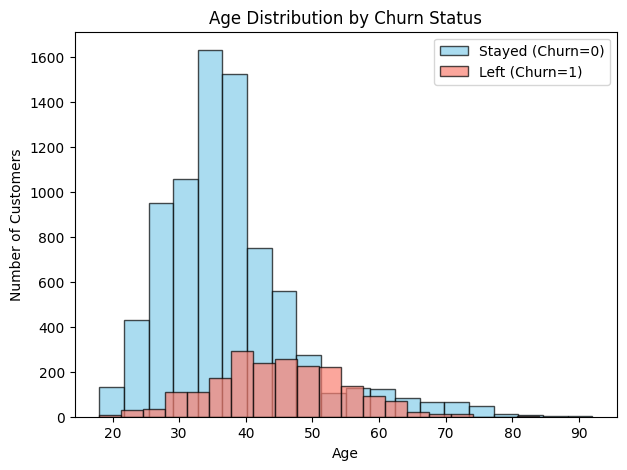

In [13]:
stayed = df[df['churn'] == 0]['age']
churned = df[df['churn'] == 1]['age']

# Plot overlapping histograms
plt.figure(figsize=(7,5))
plt.hist(stayed, bins=20, alpha=0.7, label='Stayed (Churn=0)', color='skyblue', edgecolor='black')
plt.hist(churned, bins=20, alpha=0.7, label='Left (Churn=1)', color='salmon', edgecolor='black')

plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

Visualization 3: Boxplot (Balance vs Churn)

<Figure size 600x500 with 0 Axes>

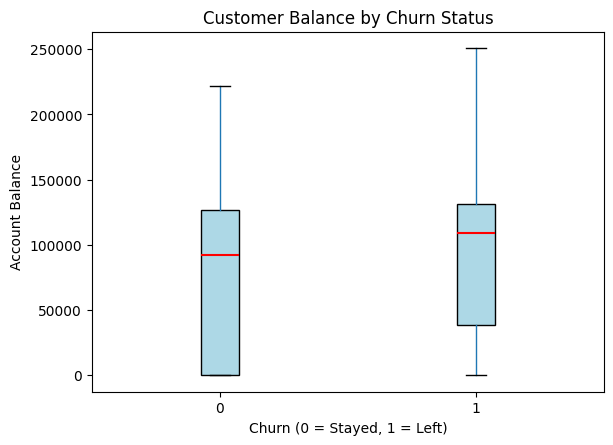

In [14]:
plt.figure(figsize=(6,5))
df.boxplot(column='balance', by='churn', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='red', linewidth=1.5))

plt.title("Customer Balance by Churn Status")
plt.suptitle("")  # removes the automatic 'Boxplot grouped by churn' title
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Account Balance")
plt.show()

Visualization 4: Scatter Plot (Tenure vs Balance by Churn)

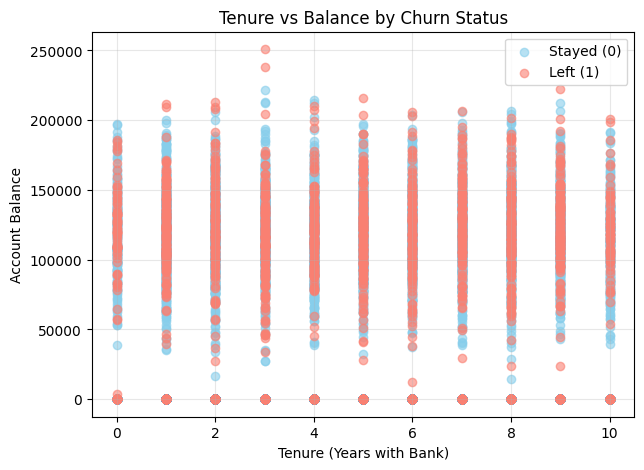

In [15]:
plt.figure(figsize=(7,5))

# Plot stayed (churn=0)
plt.scatter(df[df['churn']==0]['tenure'],
            df[df['churn']==0]['balance'],
            color='skyblue', label='Stayed (0)', alpha=0.6)

# Plot churned (churn=1)
plt.scatter(df[df['churn']==1]['tenure'],
            df[df['churn']==1]['balance'],
            color='salmon', label='Left (1)', alpha=0.6)

# Labels and title
plt.title("Tenure vs Balance by Churn Status")
plt.xlabel("Tenure (Years with Bank)")
plt.ylabel("Account Balance")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Visualization 5 — Correlation Heatmap

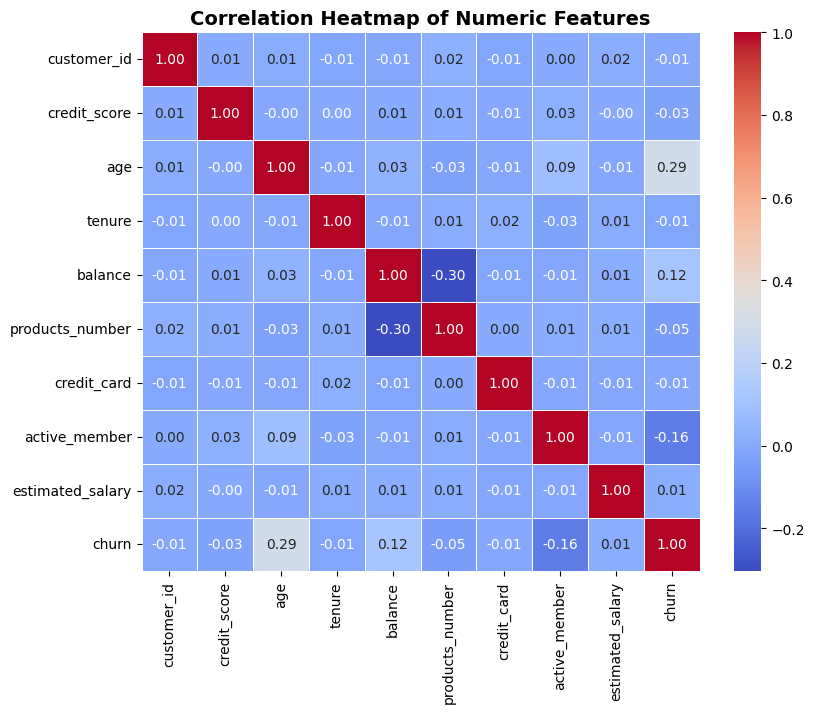

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight='bold')
plt.show()

*DATA PREPROCESSING*

ML models don’t understand text like “France” or “Female.”
So we’ll convert them to numeric form.

We’ll use:

Label Encoding for binary categories (gender)

One-Hot Encoding for multi-category (country)

In [19]:
# 1️⃣ Label Encode 'gender' (Male = 1, Female = 0)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# 2️⃣ One-Hot Encode 'country'
df = pd.get_dummies(df, columns=['country'], drop_first=True)
# drop_first=True removes one dummy column to avoid multicollinearity

print("✅ Encoding complete! New columns:")
print(df.columns)

✅ Encoding complete! New columns:
Index(['customer_id', 'credit_score', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_Germany', 'country_Spain'],
      dtype='object')


In [20]:
df.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


STEP 2 FEATURE SCALING....

We'll use StandardScaler → converts values to have mean = 0 and std = 1.

In [21]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale (excluding target)
features_to_scale = ['credit_score', 'age', 'tenure', 'balance',
                     'products_number', 'estimated_salary']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("✅ Scaling done! Numeric features normalized.")


✅ Scaling done! Numeric features normalized.


In [22]:
df.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False
1,15647311,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True
2,15619304,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False
3,15701354,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False
4,15737888,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True


STEP- 3: TRAIN TEST SPLIT..
Training set (80%) → used to train models

Testing set (20%) → used to evaluate them

In [24]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['churn', 'customer_id'])
y = df['churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Why we use stratify=y:
# It ensures the churn ratio (≈20%) stays the same in both train and test sets.
# Otherwise, you might end up with weirdly unbalanced splits.

print(" Train-Test Split Complete!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


 Train-Test Split Complete!
Training set shape: (8000, 11)
Testing set shape: (2000, 11)


 Model Building and Comparison.

In [25]:

# ------------------------------------------------------------
# 💻 Logistic Regression Model for Customer Churn Prediction
# ------------------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Create and train the model
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


In [27]:
# ------------------------------------------------------------
# 📈 Evaluate Model Performance
# ------------------------------------------------------------

# 1️⃣ Accuracy
acc = accuracy_score(y_test, y_pred)

# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 3️⃣ Classification Report (Precision, Recall, F1)
report = classification_report(y_test, y_pred)

# 4️⃣ ROC-AUC Score
auc = roc_auc_score(y_test, y_prob)

# Print results
print(" Logistic Regression Model Performance:\n")
print("Accuracy:", round(acc, 3))
print("ROC-AUC Score:", round(auc, 3))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


 Logistic Regression Model Performance:

Accuracy: 0.714
ROC-AUC Score: 0.777

Confusion Matrix:
 [[1142  451]
 [ 122  285]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



# ------------------------------------------------------------
# 📊 Conclusion (Logistic Regression):
# Logistic Regression achieved ~71% accuracy and ROC-AUC of 0.777.
# It performs well at identifying customers likely to churn (70% recall for churners),
# but with moderate precision (39%), meaning it catches most churners
# though with some false positives. A solid baseline model for churn prediction.
# ------------------------------------------------------------


***Model 2: Decision Tree ***




In [28]:
# ------------------------------------------------------------
# 🌳 Decision Tree Classifier for Customer Churn Prediction
# ------------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Create and train the model
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Evaluate
acc_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("✅ Decision Tree Model Performance:\n")
print("Accuracy:", round(acc_dt, 3))
print("ROC-AUC Score:", round(auc_dt, 3))
print("\nConfusion Matrix:\n", cm_dt)
print("\nClassification Report:\n", report_dt)


✅ Decision Tree Model Performance:

Accuracy: 0.77
ROC-AUC Score: 0.838

Confusion Matrix:
 [[1229  364]
 [  96  311]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



 🌳 Decision Tree outperformed Logistic Regression with 77% accuracy and higher recall for churners (0.76), showing stronger ability to identify customers likely to leave.


MODEL-3 RANDOM FOREST....🔥🔥🔥🔥

In [29]:
# ------------------------------------------------------------
# 🌲 Random Forest Classifier for Customer Churn Prediction
# ------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Create and train the model
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', max_depth=8)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("✅ Random Forest Model Performance:\n")
print("Accuracy:", round(acc_rf, 3))
print("ROC-AUC Score:", round(auc_rf, 3))
print("\nConfusion Matrix:\n", cm_rf)
print("\nClassification Report:\n", report_rf)


✅ Random Forest Model Performance:

Accuracy: 0.818
ROC-AUC Score: 0.866

Confusion Matrix:
 [[1348  245]
 [ 120  287]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.54      0.71      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



 🌲 Random Forest achieved 81.8% accuracy and 0.866 AUC, outperforming previous models with the best balance of precision (0.54) and recall (0.71) for churners.


#Model Comparison & Visualization

✅ Model Performance Comparison:

                 Model  Accuracy  ROC_AUC  Recall (Churners)  \
0  Logistic Regression     0.714    0.777               0.70   
1        Decision Tree     0.770    0.838               0.76   
2        Random Forest     0.818    0.866               0.71   

   Precision (Churners)  F1-score (Churners)  
0                  0.39                 0.50  
1                  0.46                 0.57  
2                  0.54                 0.61  


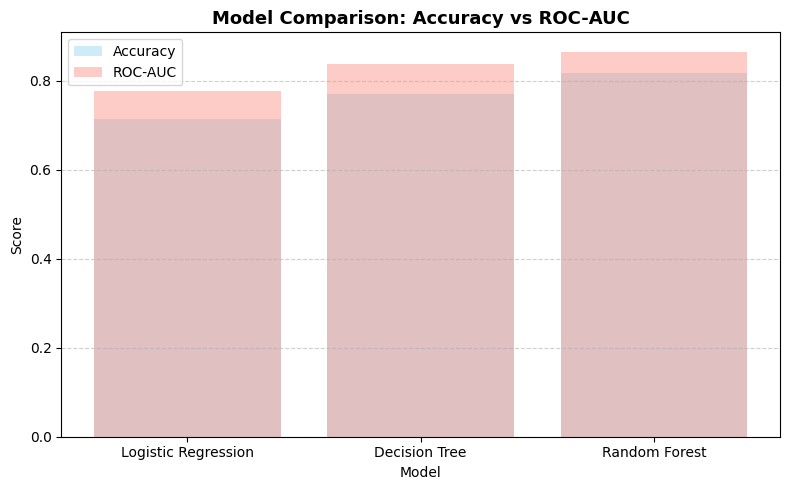

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 📊 Model Comparison Summary
# ------------------------------------------------------------

# Create DataFrame manually with saved results
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.714, 0.770, 0.818],
    'ROC_AUC': [0.777, 0.838, 0.866],
    'Recall (Churners)': [0.70, 0.76, 0.71],
    'Precision (Churners)': [0.39, 0.46, 0.54],
    'F1-score (Churners)': [0.50, 0.57, 0.61]
})

# Display table
print("✅ Model Performance Comparison:\n")
print(model_comparison)

# ------------------------------------------------------------
# 🎨 Visualization: Accuracy & ROC-AUC Comparison
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.bar(model_comparison['Model'], model_comparison['Accuracy'],
        color='skyblue', label='Accuracy', alpha=0.4)
plt.bar(model_comparison['Model'], model_comparison['ROC_AUC'],
        color='salmon', label='ROC-AUC', alpha=0.4)

plt.title("Model Comparison: Accuracy vs ROC-AUC", fontsize=13, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Feature Importance (from Random Forest)

Top 10 Important Features:

             Feature  Importance
2                age    0.370180
5    products_number    0.234415
4            balance    0.100923
9    country_Germany    0.062418
7      active_member    0.062243
8   estimated_salary    0.052275
0       credit_score    0.052251
3             tenure    0.028487
1             gender    0.022835
10     country_Spain    0.007534


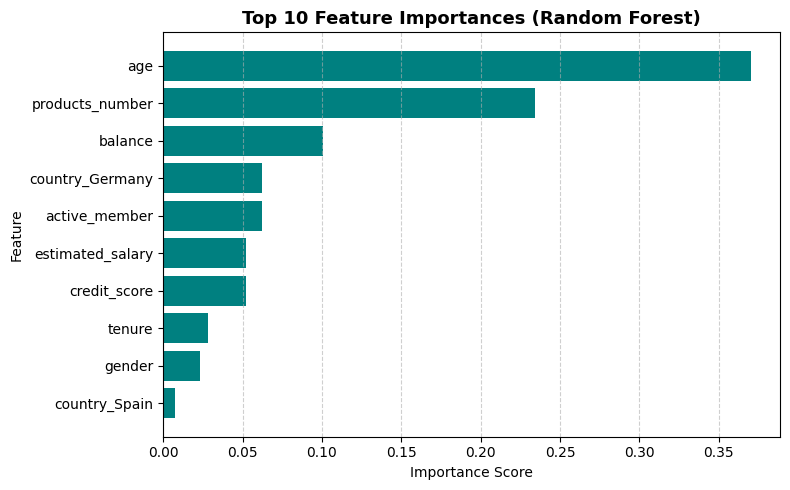

In [32]:
 #Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Match importances with feature names
features = X.columns
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance (descending)
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features:\n")
print(feat_imp.head(10))

# ------------------------------------------------------------
# 🎨 Visualization
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10], color='teal')
plt.gca().invert_yaxis()  # Highest importance at top
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=13, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

💡 Feature Importance shows that age, balance, and active_member status are key churn predictors,
 meaning older, high-balance but inactive customers are most likely to leave.


#THANK YOU....